In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Yash
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
basepath = './data/aclImdb'
dir_list = os.listdir(basepath)
dir_list

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [4]:
#creating an empty train dataframe
df_train = pd.DataFrame(columns=['Review','Polarity'])
#creating an empty test dataframe
df_test = pd.DataFrame(columns=['Review','Polarity'])

In [5]:
#Reading the reviews from files in the local directory and saving them in the train and test dataframes along with polarity.
df_index = 0
for superfolder in dir_list:
    if superfolder== 'test' or superfolder== 'train':
        subsuperfolder = os.listdir(basepath+'/'+superfolder)
        for subsuperfolder in subsuperfolder:
            if subsuperfolder == 'neg' or subsuperfolder =='pos':
                file_list = os.listdir(basepath+'/'+superfolder+'/'+subsuperfolder)
                for subfile in file_list:
                    fdata = open(basepath+'/'+superfolder+'/'+subsuperfolder+'/'+subfile, encoding="utf8")
                    if superfolder == 'train':
                        if subsuperfolder == 'neg':
                            df_train = df_train.append({'Review': fdata.read(), 'Polarity': 0}, ignore_index=True)
                        else:
                            df_train = df_train.append({'Review': fdata.read(), 'Polarity': 1}, ignore_index=True)
                    else:
                        if subsuperfolder == 'neg':
                            df_test = df_test.append({'Review': fdata.read(), 'Polarity': 0}, ignore_index=True)
                        else:
                            df_test = df_test.append({'Review': fdata.read(), 'Polarity': 1}, ignore_index=True)

In [6]:
df_train.head()

,Review,Polarity
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0


In [7]:
df_test.head()

,Review,Polarity
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


Sentiment of 0 is 50 % of total
Sentiment of 1 is 50 % of total


C:\Users\Yash Tiwari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

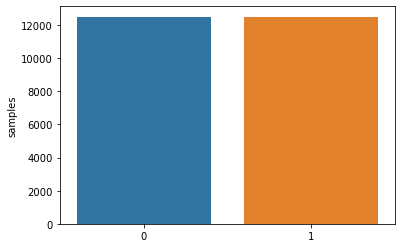

In [8]:
#Checking if no of reviews are same for pos and neg by plotting them
print('Sentiment of 0 is {} % of total'.format(round(df_train['Polarity'].value_counts()[0]/len(df_train['Polarity'])*100)))
print('Sentiment of 1 is {} % of total'.format(round(df_train['Polarity'].value_counts()[1]/len(df_train['Polarity'])*100)))
x=df_train.Polarity.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

## Pre Processing

#### Stopwords Removal
Now, let's get rid of the stopwords i.e words which occur very frequently and have possible value like a, an, the, are etc.

In [9]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print("List of stop words that we can remove from our reviews:")
print(stopWords)

List of stop words that we can remove from our reviews:
{'not', 'i', "you'd", "aren't", 'yours', 'him', 'if', 'during', 'shan', 'his', 'this', "isn't", 't', 'off', 'did', 'wouldn', 'such', "mightn't", 'haven', 'themselves', 'on', 'a', 'have', 'having', 'under', 'between', 'when', "didn't", 'what', 'we', 'into', 'ourselves', 'has', 'do', 'were', 'its', 'was', 'you', 'does', "you're", 'there', 'hasn', 'from', 'while', 'don', 'just', 'doesn', 'for', 'same', 'is', 'they', 'further', 'about', 'so', 'hadn', 'himself', 'd', 'by', 'now', "you've", 'she', 'because', 'very', 'yourself', 's', 'their', "wasn't", 'both', 'isn', "needn't", 'can', 'shouldn', 'me', 'wasn', "haven't", 'up', "that'll", 'of', 'above', 'most', 'these', 'before', 'once', 'our', 'needn', 'should', "should've", 'myself', 'that', "hasn't", "mustn't", 'ma', 'down', 'how', 'been', 'few', 'whom', 'hers', 'couldn', 'won', 'll', 'as', 'all', 'at', 'he', "wouldn't", 'to', 'it', 'o', 'any', 'my', 'yourselves', 'or', 'your', 'some', 

In [10]:
#Removing unwanted words to convert a document to a sequence of words which are more useful to determine sentiment
stopword = set(stopwords.words("english"))

for i in range(0,25000) : 
    review = df_train.iloc[i,0] # review column : 0
    review = review.lower().split()
    words = [r for r in review if not r in stopword]
    clean_review = ' '.join(words)
    df_train.iloc[i,0] = clean_review

for i in range(0,25000) : 
    review = df_test.iloc[i,0] # review column : 0
    review = review.lower().split()
    words = [r for r in review if not r in stopword]
    clean_review = ' '.join(words)
    df_test.iloc[i,0] = clean_review
    
df_train.head()

,Review,Polarity
0,story man unnatural feelings pig. starts openi...,0
1,airport '77 starts brand new luxury 747 plane ...,0
2,film lacked something put finger first: charis...,0
3,"sorry everyone,,, know supposed ""art"" film,, w...",0
4,little parents took along theater see interior...,0


#### Using Regex

In [11]:
#Removing special characters and numbers from the reviews

def review_to_words(review, string = True, remove_stopwords=True):
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\*)|(\d+)")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    NON_LETTERS = re.compile("[^a-zA-Z]")
    NO_SPACE = ""
    SPACE = " "  
    review = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in review]
    review = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in review]
    review = [NON_LETTERS.sub(SPACE, line) for line in review]  
    return review

In [12]:
# Get list of reviews
clean_train_reviews = review_to_words(df_train.Review)
clean_test_reviews = review_to_words(df_test.Review)

In [13]:
clean_train_reviews[0]

'story man unnatural feelings pig starts opening scene terrific example absurd comedy formal orchestra audience turned insane violent mob crazy chantings singers unfortunately stays absurd whole time general narrative eventually making putting even era turned off cryptic dialogue would make shakespeare seem easy third grader technical level better might think good cinematography future great vilmos zsigmond future stars sally kirkland frederic forrest seen briefly'

In [14]:
#Replacing these clean data into dataframe again
df_train = df_train.drop(columns='Review')
df_test = df_test.drop(columns='Review')

In [15]:
df_train.insert(0,'Review', clean_train_reviews)
df_test.insert(0,'Review', clean_test_reviews)

In [16]:
print(df_train)

                                                  Review Polarity
0      story man unnatural feelings pig starts openin...        0
1      airport  starts brand new luxury  plane loaded...        0
2      film lacked something put finger first charism...        0
3      sorry everyone know supposed art film wow hand...        0
4      little parents took along theater see interior...        0
...                                                  ...      ...
24995  seeing vote average pretty low fact clerk vide...        1
24996  plot wretched unbelievable twists however chem...        1
24997  amazed movieand others average  stars lower cr...        1
24998  christmas together actually came time ive rais...        1
24999  working class romantic drama director martin r...        1

[25000 rows x 2 columns]


#### Shuffle the data

<b> Shuffling the data so that the neg and pos polarities are not in order and get mixed </b>

In [17]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [18]:
df_train.head()

,Review,Polarity
0,haunting film boasts really creepy house good ...,1
1,reading rave reviews film give so so finally d...,0
2,one person says this movie beautiful delicate ...,1
3,bar questionable acting there musicians end da...,1
4,powerfully wonderful movie held death grip let...,1


In [19]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [20]:
df_test.head()

,Review,Polarity
0,saw mystery science theater even show really ...,0
1,best thing say american version jane turner gi...,0
2,claude lelouchs movie pretty good moment cinem...,1
3,drug runner archie moses introduces friend roc...,0
4,questions sometimes hover us answer two women ...,1


In [121]:
# making list of reviews
Train_reviews_clean = df_train['Review'].tolist()
Test_reviews_clean = df_test['Review'].tolist()

In [122]:
#making list of polarity
y_train_polarity = df_train['Polarity'].tolist()
y_test_polarity = df_test['Polarity'].tolist()

### Using Feed Forward Neural Network for modelling

In [123]:
# Tokeniser
tok = keras.preprocessing.text.Tokenizer()
tok.fit_on_texts(Train_reviews_clean) 
X_train_clean = tok.texts_to_sequences(Train_reviews_clean)
X_test_clean = tok.texts_to_sequences(Test_reviews_clean)

In [125]:
#Padding 
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_clean,padding='post',maxlen=1000)
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_clean,padding='post',maxlen=1000)

#Splitting train dataset into train and validation sets for training
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train_polarity, test_size=0.3, random_state=42)

In [126]:
X_train

array([[1676, 9211,  103, ...,    0,    0,    0],
       [8494,   39,  300, ...,    0,    0,    0],
       [ 126,  822, 9662, ...,    0,    0,    0],
       ...,
       [1819,   79,  368, ...,    0,    0,    0],
       [ 767, 1047,   72, ...,    0,    0,    0],
       [ 726,   51,    2, ...,    0,    0,    0]])

In [127]:
# Building Model
# input shape is the vocabulary count used for the movie reviews (10,000 words)
word_size = len(tok.word_index)+1

model = keras.Sequential()
model.add(keras.layers.Embedding(word_size, 16))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv1D(filters=16,kernel_size=2,padding='valid',activation='relu'))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          1448624   
_________________________________________________________________
dropout_18 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 16)          528       
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)               

In [128]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [129]:
history = model.fit(tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train),epochs=20,validation_data=(tf.convert_to_tensor(X_val), tf.convert_to_tensor(y_val)),verbose=1,batch_size=512)

Epoch 1/20
35/35 [==============================] - 17s 442ms/step - loss: 0.6931 - acc: 0.5033 - val_loss: 0.6930 - val_acc: 0.4952
Epoch 2/20
35/35 [==============================] - 15s 428ms/step - loss: 0.6927 - acc: 0.5185 - val_loss: 0.6922 - val_acc: 0.5207
Epoch 3/20
35/35 [==============================] - 15s 429ms/step - loss: 0.6903 - acc: 0.5593 - val_loss: 0.6875 - val_acc: 0.6408
Epoch 4/20
35/35 [==============================] - 15s 424ms/step - loss: 0.6812 - acc: 0.6135 - val_loss: 0.6727 - val_acc: 0.6228
Epoch 5/20
35/35 [==============================] - 15s 436ms/step - loss: 0.6555 - acc: 0.6503 - val_loss: 0.6412 - val_acc: 0.6683
Epoch 6/20
35/35 [==============================] - 15s 430ms/step - loss: 0.6068 - acc: 0.7106 - val_loss: 0.5878 - val_acc: 0.7623
Epoch 7/20
35/35 [==============================] - 15s 429ms/step - loss: 0.5294 - acc: 0.7785 - val_loss: 0.5045 - val_acc: 0.7948
Epoch 8/20
35/35 [==============================] - 15s 432ms/step - 

In [131]:
model.save('./models/20892602Group44_NLP_model.h5')

In [132]:
model=tf.keras.models.load_model('./models/20892602Group44_NLP_model.h5')

In [134]:
#accuracy on test set
scores = model.evaluate(tf.convert_to_tensor(X_test_padded),tf.convert_to_tensor(y_test_polarity))
test_accuracy = scores[1]
print('accuracy on testing set:',test_accuracy*100)

782/782 [==============================] - 7s 9ms/step - loss: 0.3189 - acc: 0.8789
accuracy on testing set: 87.88800239562988


### The test Accuracy came as 87.88 after using Feed Forward Neural Network which is the best accuracy so far in our modelling network.

In [34]:
%run train_NLP.py

Loading the training dataset:
Removing stop words from training dataset:
Removing special characters from training dataset:
Training data set is:                                              Review Polarity
0  saw film twice space one week times cinema orp...        1
1  doc savage man bronze  outta  stars dreadful d...        0
2  movie similar play entitled blithe spirit writ...        0
3  one harder hitting stories thats real strength...        1
4  ive recently went back watched movie seeing ye...        1 




Tokenizing words
Padding Sequence:
Training Model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          1448624   
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (

In [99]:
%run test_NLP.py

Loading the testing dataset:
Removing special characters from testing Data:
Removing stop words from testing Data:
Tokenizing words
Padding Sequence:
782/782 [==============================] - 8s 9ms/step - loss: 0.3359 - acc: 0.8758
accuracy on testing dataset is: 87.5760018825531


accuracy on testing dataset is: 87.5760018825531

### Modelling using Logistic Regression

In [139]:
#Vectorization
cv = CountVectorizer(binary=True)
cv.fit(df_train['Review'])
X_train1 = cv.transform(df_train['Review'])
X_test1 = cv.transform(df_test['Review'])

In [144]:
y_train1 = df_train['Polarity']
#y_train1 = y_train_polarity.astype('int')

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train1, y_train_polarity)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(df_test['Polarity'].astype('int'), lr.predict(X_test1))))

Accuracy for C=0.01: 0.8772
Accuracy for C=0.05: 0.881
Accuracy for C=0.25: 0.87448


C:\Users\Yash Tiwari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.87164
Accuracy for C=1: 0.86904


C:\Users\Yash Tiwari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### The best Accuracy came for C=0.01: 0.8772 while using Logestic Regression but its not as good as the one in feed Forward Neural Network.

### Using CNN and LSTM for modelling

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [22]:
# making list of reviews
Train_reviews_clean = df_train['Review'].tolist()
Test_reviews_clean = df_test['Review'].tolist()
#making list of polarity
y_train_polarity = df_train['Polarity'].tolist()
y_test_polarity = df_test['Polarity'].tolist()

In [23]:
# Tokeniser
tok = keras.preprocessing.text.Tokenizer()
tok.fit_on_texts(Train_reviews_clean) 
X_train_clean = tok.texts_to_sequences(Train_reviews_clean)
X_test_clean = tok.texts_to_sequences(Test_reviews_clean)

In [24]:
#Padding 
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_clean,padding='post',maxlen=1000)
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_clean,padding='post',maxlen=1000)

#Splitting train dataset into train and validation sets for training
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train_polarity, test_size=0.3, random_state=42)

In [154]:
# Using embedding from Keras
word_size = len(tok.word_index)+1
model = keras.Sequential()
model.add(keras.layers.Embedding(word_size, 16))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(keras.layers.Conv1D(filters=64,kernel_size=3,padding='valid',activation='relu'))
model.add(keras.layers.Conv1D(filters=32,kernel_size=3,padding='valid',activation='relu'))
model.add(keras.layers.Conv1D(filters=16,kernel_size=3,padding='valid',activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          1448624   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 64)          3136      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          6176      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 16)          1552      
_________________________________________________________________
dropout_21 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
dense_14 (Dense)             (None, None, 32)          544       
_________________________________________________________________
dropout_22 (Dropout)         (None, None, 32)         

In [155]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [156]:
history = model.fit(tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train),epochs=20,validation_data=(tf.convert_to_tensor(X_val), tf.convert_to_tensor(y_val)),verbose=1,batch_size=512)

Epoch 1/20
35/35 [==============================] - 46s 1s/step - loss: 0.6932 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.5013
Epoch 2/20
35/35 [==============================] - 44s 1s/step - loss: 0.6922 - acc: 0.5136 - val_loss: 0.6901 - val_acc: 0.5123
Epoch 3/20
35/35 [==============================] - 44s 1s/step - loss: 0.6852 - acc: 0.5178 - val_loss: 0.6831 - val_acc: 0.5173
Epoch 4/20
35/35 [==============================] - 44s 1s/step - loss: 0.6784 - acc: 0.5290 - val_loss: 0.6811 - val_acc: 0.5257
Epoch 5/20
35/35 [==============================] - 44s 1s/step - loss: 0.6737 - acc: 0.5282 - val_loss: 0.6809 - val_acc: 0.5196
Epoch 6/20
35/35 [==============================] - 43s 1s/step - loss: 0.6706 - acc: 0.5338 - val_loss: 0.6818 - val_acc: 0.5259
Epoch 7/20
35/35 [==============================] - 44s 1s/step - loss: 0.6681 - acc: 0.5353 - val_loss: 0.6829 - val_acc: 0.5193
Epoch 8/20
35/35 [==============================] - 45s 1s/step - loss: 0.6664 - acc: 0.53

In [157]:
#accuracy on test set
scores = model.evaluate(tf.convert_to_tensor(X_test_padded),tf.convert_to_tensor(y_test_polarity))
test_accuracy = scores[1]
print('accuracy on testing set:',test_accuracy*100)

782/782 [==============================] - 11s 14ms/step - loss: 0.7221 - acc: 0.5164
accuracy on testing set: 51.643335819244385


In [29]:
# Using embedding from Keras for LSTM
word_size = len(tok.word_index)+1
model = keras.Sequential()
model.add(keras.layers.Embedding(word_size, 16))
model.add(keras.layers.SpatialDropout1D(0.2))

# Convolutional model (3x conv, flatten, 2x dense)
#model.add(keras.layers.LSTM(units=100,activation='relu',dropout=0.2,recurrent_dropout=0.2,return_sequences=True))
model.add(keras.layers.LSTM(units=50,activation='relu',dropout=0.2,recurrent_dropout=0.2,return_sequences=True))
model.add(keras.layers.LSTM(units=20,activation='relu',dropout=0.2,recurrent_dropout=0.2))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          1448624   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 16)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 50)          13400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                672       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [31]:
history = model.fit(tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train),epochs=5,validation_data=(tf.convert_to_tensor(X_val), tf.convert_to_tensor(y_val)),verbose=1,batch_size=512)

Epoch 1/5
35/35 [==============================] - 1031s 29s/step - loss: 0.6932 - acc: 0.5023 - val_loss: 0.6933 - val_acc: 0.4920
Epoch 2/5
35/35 [==============================] - 1186s 34s/step - loss: 0.6932 - acc: 0.5034 - val_loss: 0.6933 - val_acc: 0.4920
Epoch 3/5
35/35 [==============================] - 1318s 38s/step - loss: 0.6931 - acc: 0.5034 - val_loss: 0.6933 - val_acc: 0.4920
Epoch 4/5
33/35 [===========================>..] - ETA: 1:18 - loss: 0.6931 - acc: 0.4990

KeyboardInterrupt: 